In [1]:
import os
os.chdir('E:\学习\python\py_codbase\POPs_LLM')

In [2]:
from PK_LLM_endfront.Langgraph.Graph import app

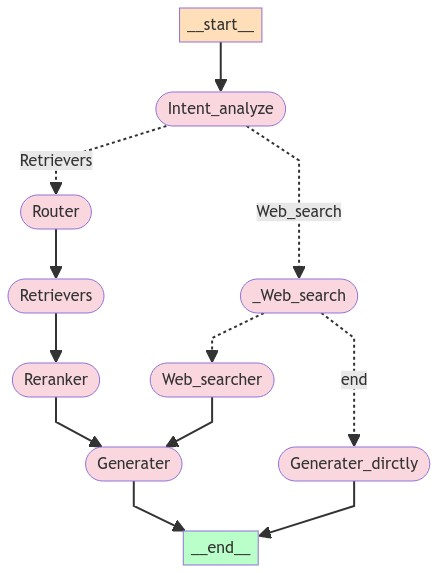

In [3]:
from IPython.display import Image, display


display(Image(app.get_graph().draw_mermaid_png()))


In [4]:
import nest_asyncio
nest_asyncio.apply()

In [7]:
from langchain_core.messages import HumanMessage

inputs = {'question':'你是谁','history':''}
async for event in app.astream_events(inputs, version="v1"):
    kind = event["event"]
    if kind == "on_chat_model_stream":
        content = event["data"]["chunk"].content
        if content:
            # Empty content in the context of OpenAI or Anthropic usually means
            # that the model is asking for a tool to be invoked.
            # So we only print non-empty content
            print(content, end="|")
    elif kind == "on_tool_start":
        print("--")
        print(
            f"Starting tool: {event['name']} with inputs: {event['data'].get('input')}"
        )
    elif kind == "on_tool_end":
        print(f"Done tool: {event['name']}")
        print(f"Tool output was: {event['data'].get('output')}")
        print("--")

---Doing Intent_analyze---


2024-05-18 13:26:01.729 | INFO     | PK_LLM_endfront.Langgraph.Nodes:Intent_analyze:43 - 你是谁 has been transformed into 请介绍一下你自己
2024-05-18 13:26:01.735 | INFO     | PK_LLM_endfront.Langgraph.Edges:Retrieval_manager:19 - 请介绍一下你自己 don't need retrieval


retrieval=False question='请介绍一下你自己'
---Doing Retrieval_manager---
{'retrieval': False, 'question': '请介绍一下你自己', 'history': ''}
---Doing Web_search_manager---
---Doing Generater_dirctly---
你|好|，|我|是|一|名|智|能|助|手|，|专|注|于|为|用户|提|供|信息|查询|和|问题|解|答|服务|。|我|可以|回|答|各|种|各|样|的|问题|，|帮|助|用户|解|决|困|惑|和|疑|问|。|如果|您|有|任|何|问题|需要|帮|助|，|欢|迎|随|时|向|我|提|问|。|我|会|尽|力|为|您|提|供|准|确|和|有|用|的|信息|。|希|望|能|够|为|您|提|供|帮|助|，|谢|谢|！|